In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/davidmasip/Documents/Workspace/gx_ds_analytics/default_env/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def get_ate_ols(df, covariates=None):
    covariates = [] if not covariates else covariates
    T = 'T +' if covariates else 'T'
    result = smf.ols(f'Y ~ {T}' + '+'.join(covariates), data=df).fit()
    return result.params['T']

def get_ate_ttest(df):
    return df.query("T == 1")["Y"].mean() - df.query("T == 0")["Y"].mean()

def plot_ates(ates, real_ate):
    ates_df = pd.DataFrame(ates).melt().rename(columns={"variable": "Method", "value": "ATE estimate"})
    sns.displot(x='ATE estimate',data=ates_df, fill=True, kind='kde', hue='Method', common_norm=False, alpha=.4, linewidth=0, bw_adjust=1.2)
    plt.vlines(real_ate, plt.ylim()[0], plt.ylim()[1], linestyles="dashed", label='ATE',colors='k')
    plt.show()


[![](https://mermaid.ink/img/pako:eNpljzEKwzAMRa8iNCcX8NCp3dqlzdCCFhErjSG2gysPJeTudR0KgS7S0-dLfC3YRyto8Jl4HuF8pQAAd2jbAzx23FXudvpfqQ2wQS_Js7Pl6PLVCHUUL4SmoJWB86SEFNZizbNllZN1GhMaTVka5Kzx9g79b948R8clokcz8PQqqtSdyxa-_rB-ACiEPms)](https://mermaid.live/edit#pako:eNpljzEKwzAMRa8iNCcX8NCp3dqlzdCCFhErjSG2gysPJeTudR0KgS7S0-dLfC3YRyto8Jl4HuF8pQAAd2jbAzx23FXudvpfqQ2wQS_Js7Pl6PLVCHUUL4SmoJWB86SEFNZizbNllZN1GhMaTVka5Kzx9g79b948R8clokcz8PQqqtSdyxa-_rB-ACiEPms)

In [3]:
def logit(x):
    return np.log(x / (1-x))

def expit(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def generate_data_1(effect):

    df = pd.DataFrame()
    N = 1000
    t_slope_x = 1
    y_slope_x = 3
    df["X"] = np.random.normal(size=N)
    df["T"] = (expit(np.random.normal(size=N) + t_slope_x * df["X"]) > 0.5).astype(int)
    df["Y"] = np.random.normal(size=N) + y_slope_x * df["X"] + effect * df["T"]
    return df

In [5]:
ates = []
effect = 0.2
for _ in range(100):
    df = generate_data_1(effect)
    ate_ols_x = get_ate_ols(df, covariates=["X"])
    ate_ols_vainilla = get_ate_ols(df)
    ates.append({"Using covariate X": ate_ols_x, "Not using covariates": ate_ols_vainilla})

$$X \sim N(0, 1)$$
$$T \sim sigmoid(X + N(0, 1)) > 0.5$$
$$Y \sim 3 \cdot X + 0.2 \cdot T + N(0, 1)$$

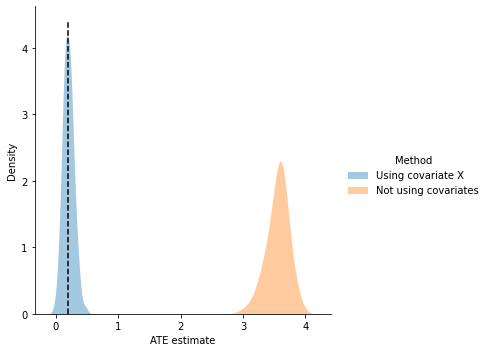

In [6]:
plot_ates(ates, effect)

[![](https://mermaid.ink/img/pako:eNo1jjEOwjAQBL9y2jr5gAsq6KABCpDcnOILsRQ7kTkXUZS_Yxylm13tSrOim5zA4JN4Huh6t5GIXtS2J3pXfh5cE6FBkBTYu3Ja_52FDhLEwhR00nMe1cLGrUzz7Fjl4rxOCUZTlgacdXossTvyvjl7LgoBpufxW1qpn9suVx23H44LNxU)](https://mermaid.live/edit#pako:eNo1jjEOwjAQBL9y2jr5gAsq6KABCpDcnOILsRQ7kTkXUZS_Yxylm13tSrOim5zA4JN4Huh6t5GIXtS2J3pXfh5cE6FBkBTYu3Ja_52FDhLEwhR00nMe1cLGrUzz7Fjl4rxOCUZTlgacdXossTvyvjl7LgoBpufxW1qpn9suVx23H44LNxU)

In [7]:
df = pd.DataFrame()
N = 1000
t_slope_x = 1
y_slope_x = 3
effect = 0.2
df["X"] = np.random.normal(size=N)
df["T"] = (expit(np.random.normal(size=N)) > 0.5).astype(int)
df["Y"] = np.random.normal(size=N) + y_slope_x * df["X"] + effect * df["T"]

def generate_data_2(effect):

    df = pd.DataFrame()
    N = 1000
    y_slope_x = 3
    df["X"] = np.random.normal(size=N)
    df["T"] = (expit(np.random.normal(size=N)) > 0.5).astype(int)
    df["Y"] = np.random.normal(size=N) + y_slope_x * df["X"] + effect * df["T"]
    return df

$$X \sim N(0, 1)$$
$$T \sim sigmoid(N(0, 1)) > 0.5$$
$$Y \sim 3 \cdot X + 0.2 \cdot T + N(0, 1)$$

In [8]:
ates = []
effect = 0.2
for _ in range(100):
    df = generate_data_2(effect)
    ate_ols_x = get_ate_ols(df, covariates=["X"])
    ate_ols_vainilla = get_ate_ols(df)
    ates.append({"Using covariate X": ate_ols_x, "Not using covariates": ate_ols_vainilla})

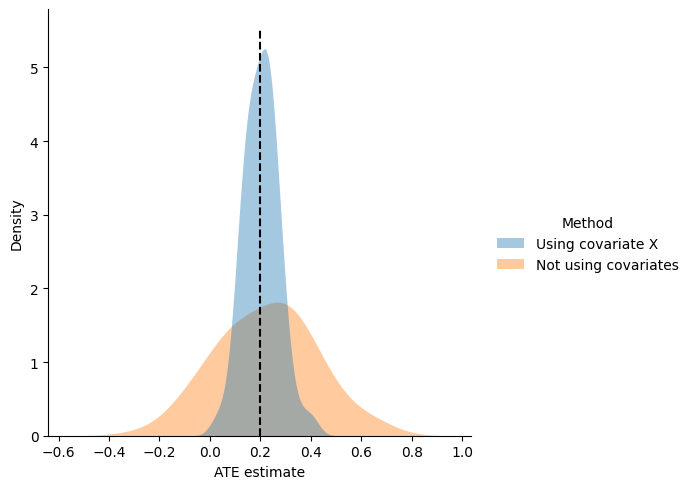

In [9]:
plot_ates(ates, effect)

[![](https://mermaid.ink/img/pako:eNpljzEOwjAMRa9ieW4vkIEJNliAgUpZrMalkZqkCs5QVb07JhVTF_v569v6XrFPjtHgO9M8wvVuIwB00LYneFV-HrirfCi1ATYYOAfyTo-uP82ijBzYolF0PFCZxKKNm1rL7Ej44rykjEZy4QapSHossf_Pu-fsSSMGNANNH1W57tz28PWH7Qsocj5r)](https://mermaid.live/edit#pako:eNpljzEOwjAMRa9ieW4vkIEJNliAgUpZrMalkZqkCs5QVb07JhVTF_v569v6XrFPjtHgO9M8wvVuIwB00LYneFV-HrirfCi1ATYYOAfyTo-uP82ijBzYolF0PFCZxKKNm1rL7Ej44rykjEZy4QapSHossf_Pu-fsSSMGNANNH1W57tz28PWH7Qsocj5r)

In [10]:
def generate_data_3(effect):

    df = pd.DataFrame()
    N = 1000
    t_slope_x = 1
    y_slope_x = 1
    df["T"] = (expit(np.random.normal(size=N)) > 0.5).astype(int)
    df["Y"] = np.random.normal(size=N) + effect * df["T"]
    df["X"] = np.random.normal(size=N) + t_slope_x * df["T"] + y_slope_x * df["Y"]
    return df

$$T \sim sigmoid(N(0, 1)) > 0.5$$
$$Y \sim T + N(0, 1)$$
$$X \sim Y + T + N(0, 1)$$

In [11]:
ates = []
effect = 1
for _ in range(100):
    df = generate_data_3(effect)
    ate_ols_x = get_ate_ols(df, covariates=["X"])
    ate_ols_vainilla = get_ate_ols(df)
    ates.append({"Using covariate X": ate_ols_x, "Not using covariates": ate_ols_vainilla})

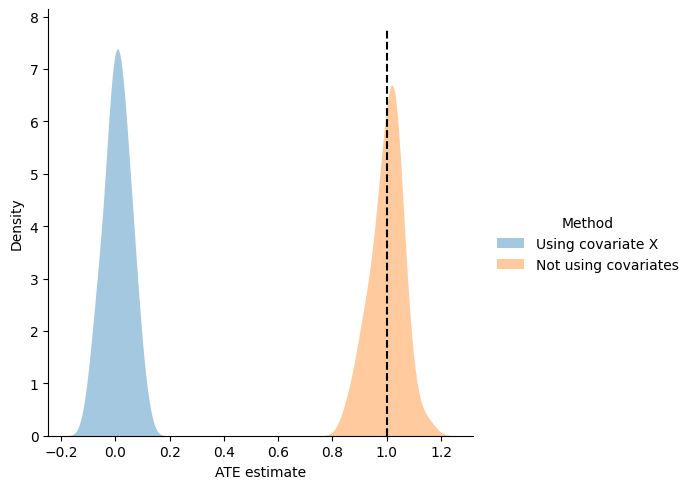

In [12]:
plot_ates(ates, effect)

[![](https://mermaid.ink/img/pako:eNo1jjEOwjAMRa9ieW4vkIEJNliAASQvVu3SSE1SBWdAVe9OSMVifT89y3_FIYmiw1fmZYLzlSIAPKDvD3Bv80mxMcAOg-bAXqq-_hihTRqU0NUoOnKZjZDiVtWyCJuexFvK6CwX7ZCLpdsnDv99d46e6_OAbuT5Xam2m8teq7Xbvoe-NZI)](https://mermaid.live/edit#pako:eNo1jjEOwjAMRa9ieW4vkIEJNliAASQvVu3SSE1SBWdAVe9OSMVifT89y3_FIYmiw1fmZYLzlSIAPKDvD3Bv80mxMcAOg-bAXqq-_hihTRqU0NUoOnKZjZDiVtWyCJuexFvK6CwX7ZCLpdsnDv99d46e6_OAbuT5Xam2m8teq7Xbvoe-NZI)

In [13]:
effect = 1

def replace_0_1_random(x: pd.Series, replace_frac: float):
    """Replace 0s and 1s in a series with random values."""
    assert 0 <= replace_frac <= 1
    x = x.copy()
    zeros = x == 0
    ones = x == 1
    x[zeros] = np.random.choice([0, 1], size=(zeros).sum(), p=[1 - replace_frac, replace_frac])
    x[ones] = np.random.choice([0, 1], size=(ones).sum(), p=[replace_frac, 1 - replace_frac])
    return x

def generate_data_4(effect):

    df = pd.DataFrame()
    N = 1000
    df["X"] = (expit(np.random.normal(size=N)) > 0.5).astype(int)
    df["T"] = replace_0_1_random(df["X"], replace_frac=0.05)
    # df["T"] = df["X"]
    df["Y"] = np.random.normal(size=N, scale=5) + effect * df["T"]


    return df

$$X \sim sigmoid(N(0, 1)) > 0.5$$
$$T \sim X + \text{Some random replacements (convert 5\% of 1 to 0 and 5\% of 0 to 1)}$$
$$Y \sim T + N(0, 1)$$

In [14]:
ates = []
effect = 1
for _ in range(100):
    df = generate_data_4(effect)
    ate_ols_x = get_ate_ols(df, covariates=["X"])
    ate_ols_vainilla = get_ate_ols(df)
    ates.append({"Using covariate X": ate_ols_x, "Not using covariates": ate_ols_vainilla})

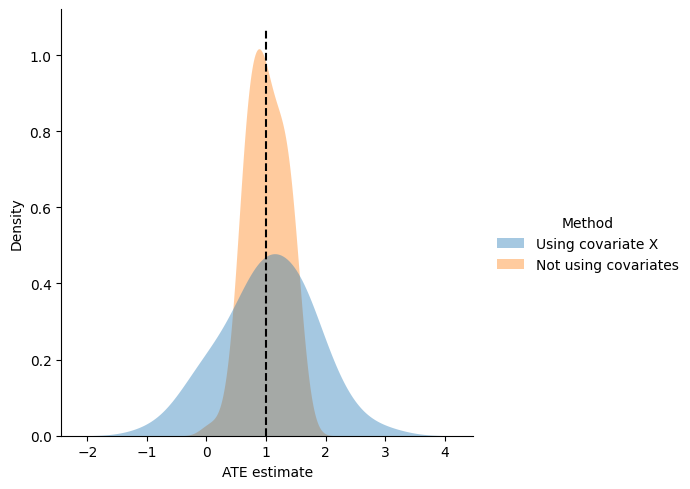

In [15]:
plot_ates(ates, effect)